In [1]:
from hapi import*
import pandas as pd

HAPI version: 1.2.2.2
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
db_begin('data')

Using data

H2O_13
                     Lines parsed: 170
H2O_07
                     Lines parsed: 585
H2O
                     Lines parsed: 251
CO2
                     Lines parsed: 129
H2O_14
                     Lines parsed: 251


In [15]:
#--- convert wavelengths to wavenumber
wl_start = 10.8e-6 #m
wl_end = 11.6e-6 #m

wn_end = round((1/wl_start)/100, 2) #cm-1
wn_start = round((1/wl_end)/100, 2) #cm-1

print('Wavenumbers from ' + str(wn_start) +' to '+ str(wn_end))

Wavenumbers from 862.07 to 925.93


In [16]:
#--- fetch(name of table with data, molecule number, isotopologue number, wavenumber start, wavenumber end)

fetch('H2O',1,1,wn_start,wn_end)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 251
PROCESSED


In [17]:
tableList()

dict_keys(['sampletab', 'H2O_13', 'H2O_07', 'H2O', 'CO2', 'H2O_14'])

In [18]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 862.070-925.930 wavenumber range
Number of rows: 251
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag       

In [19]:
mol_id=1
iso_id=1
abundance(mol_id,iso_id)

0.9973173

HITRAN units = True means that we are using cm2 molec-1. If this were set to False, we would be using cm-1. 

In [26]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='H2O', Environment={'T':300.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
print(max(coef))
print(np.mean(coef))

{'self': 1.0}
0.069381 seconds elapsed for abscoef; nlines = 251
3.397598872483896e-23
2.5505106905463123e-24


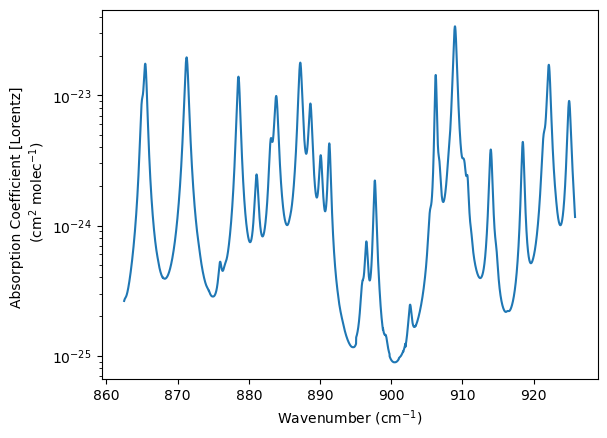

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogy(nu,coef)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

In [28]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='H2O', Environment={'T':300.,'p':.000987}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
print(max(coef))
print(np.mean(coef))

{'self': 1.0}
0.057347 seconds elapsed for abscoef; nlines = 251
3.3294675966723154e-20
2.8785027046597954e-24


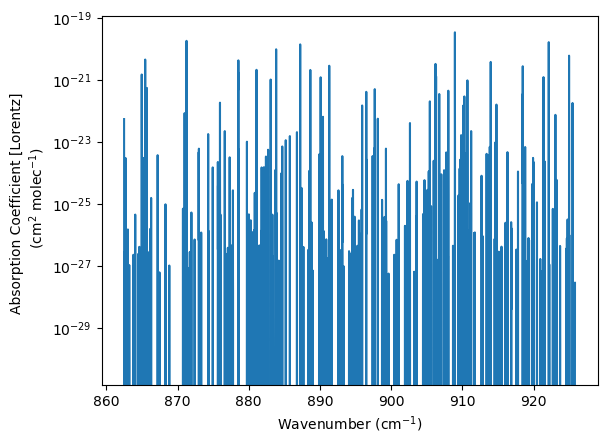

In [24]:
fig, ax = plt.subplots()
ax.semilogy(nu,coef)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()